In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [4]:
import tarfile
fname = 'fer2013.tar.gz'
if fname.endswith("tar.gz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()
elif fname.endswith("tar"):
    tar = tarfile.open(fname, "r:")
    tar.extractall()
    tar.close()

In [5]:
import os 
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [60]:
df = pd.read_csv('fer2013/fer2013.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


***No_of Unique Emotion***

In [61]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

## yetechemere

In [62]:
train_set = df[(df.Usage == 'Training')]
validation_set = df[(df.Usage == 'PublicTest')]
test_set = df[(df.Usage == 'PrivateTest')]

In [63]:
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'} 
num_class = len(label_to_text)

In [64]:
label_to_text

{0: 'anger',
 1: 'disgust',
 2: 'fear',
 3: 'happiness',
 4: 'sadness',
 5: 'surprise',
 6: 'neutral'}

In [65]:
print('Samples per emotion:')
print(df.emotion.value_counts())

Samples per emotion:
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64


In [66]:
df.pixels.loc[0].split(' ')

['70',
 '80',
 '82',
 '72',
 '58',
 '58',
 '60',
 '63',
 '54',
 '58',
 '60',
 '48',
 '89',
 '115',
 '121',
 '119',
 '115',
 '110',
 '98',
 '91',
 '84',
 '84',
 '90',
 '99',
 '110',
 '126',
 '143',
 '153',
 '158',
 '171',
 '169',
 '172',
 '169',
 '165',
 '129',
 '110',
 '113',
 '107',
 '95',
 '79',
 '66',
 '62',
 '56',
 '57',
 '61',
 '52',
 '43',
 '41',
 '65',
 '61',
 '58',
 '57',
 '56',
 '69',
 '75',
 '70',
 '65',
 '56',
 '54',
 '105',
 '146',
 '154',
 '151',
 '151',
 '155',
 '155',
 '150',
 '147',
 '147',
 '148',
 '152',
 '158',
 '164',
 '172',
 '177',
 '182',
 '186',
 '189',
 '188',
 '190',
 '188',
 '180',
 '167',
 '116',
 '95',
 '103',
 '97',
 '77',
 '72',
 '62',
 '55',
 '58',
 '54',
 '56',
 '52',
 '44',
 '50',
 '43',
 '54',
 '64',
 '63',
 '71',
 '68',
 '64',
 '52',
 '66',
 '119',
 '156',
 '161',
 '164',
 '163',
 '164',
 '167',
 '168',
 '170',
 '174',
 '175',
 '176',
 '178',
 '179',
 '183',
 '187',
 '190',
 '195',
 '197',
 '198',
 '197',
 '198',
 '195',
 '191',
 '190',
 '145',
 '86'

In [67]:
np.array(df.pixels.loc[0].split(' ')).reshape(48,48)

array([['70', '80', '82', ..., '52', '43', '41'],
       ['65', '61', '58', ..., '56', '52', '44'],
       ['50', '43', '54', ..., '49', '56', '47'],
       ...,
       ['91', '65', '42', ..., '72', '56', '43'],
       ['77', '82', '79', ..., '105', '70', '46'],
       ['77', '72', '84', ..., '106', '109', '82']], dtype='<U3')

In [68]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48,1).astype('float32'))

In [15]:
from math import sqrt
depth = 1
height = int(sqrt(len(df.pixels[0].split())))
width = height

In [16]:
df = train_set.values
pixels = df[:, 1]
X_train = np.zeros((train_set.shape[0], 48*48))
for ix in range(X_train.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(X_train.shape[1]):
        X_train[ix, iy] = int(p[iy])

df = validation_set.values
pixels = df[:, 1]
X_validation = np.zeros((validation_set.shape[0], 48*48))
for ix in range(X_validation.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(X_validation.shape[1]):
        X_validation[ix, iy] = int(p[iy])

df = test_set.values
pixels = df[:, 1]
X_test = np.zeros((test_set.shape[0], 48*48))
for ix in range(X_test.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(X_test.shape[1]):
        X_test[ix, iy] = int(p[iy])

In [17]:
print(np.array(validation_set.emotion))

[0 1 4 ... 4 4 4]


In [99]:
#plt.imshow(np.array(df.pixels.loc[6].split(' ')).reshape(48,48).astype('float'), cmap = 'gray')

neutral


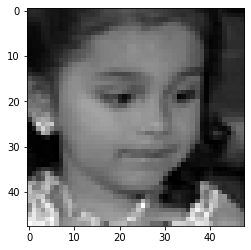

In [23]:
sample_number = 322
import numpy as np
import scipy.misc
img = np.mat(X_test[sample_number]).reshape(48,48)
plt.imshow(img,cmap='gray')
print(label_to_text[np.array(test_set.emotion)[sample_number]])

In [30]:
num_train = X_train.shape[0]
num_validation = X_validation.shape[0]
num_test = X_test.shape[0]

X_train = X_train.reshape(num_train, width, height, depth)
X_validation = X_validation.reshape(num_test, width, height, depth)
X_test = X_test.reshape(num_test, width, height, depth)

print('Training: ',X_train.shape)
print('Validation: ',X_validation.shape)
print('Test: ',X_test.shape)

Training:  (28709, 48, 48, 1)
Validation:  (3589, 48, 48, 1)
Test:  (3589, 48, 48, 1)


In [31]:
from keras.utils import np_utils

y_train = train_set.emotion
y_train = np_utils.to_categorical(y_train, num_class)

y_validation = validation_set.emotion
y_validation = np_utils.to_categorical(y_validation, num_class)

y_test = test_set.emotion
y_test = np_utils.to_categorical(y_test, num_class)

print('Training: ',y_train.shape)
print('Validation: ',y_validation.shape)
print('Test: ',y_test.shape)

Training:  (28709, 7)
Validation:  (3589, 7)
Test:  (3589, 7)


In [69]:
img_array = np.stack(img_array, axis = 0)

In [70]:
img_array.shape

(35887, 48, 48, 1)

In [72]:
#plt.imshow(img_array[0],cmap = 'gray')

In [74]:
labels = df.emotion.values

In [75]:
X_train,x_test,y_train,y_test = train_test_split(img_array,labels,test_size = 0.2)

In [42]:
#X_train.shape,x_test.shape,y_train.shape,y_test.shape

((28709, 48, 48, 1), (7178, 48, 48, 1), (28709,), (7178,))

In [76]:
X_train = X_train/255
x_test = x_test/255

In [32]:
from keras.layers import Convolution2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling2D
from keras.models import Sequential

model = Sequential()

model.add(Convolution2D(64, (3, 1), padding='same', input_shape=(48,48,1)))
model.add(Convolution2D(64, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3, 1), padding='same'))
model.add(Convolution2D(128, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(256, (3, 1), padding='same'))
model.add(Convolution2D(256, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(512, (3, 1), padding='same'))
model.add(Convolution2D(512, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7))
model.add(Activation('softmax'))


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        256       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        12352     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0

In [34]:
from keras.preprocessing.image import ImageDataGenerator 

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.0,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.0,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,   # randomly flip images
    )


datagen.fit(X_train)
datagen.fit(X_validation)

In [36]:
batch_size = 256
num_epochs = 30

In [37]:
#from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

#filepath='Model.{epoch:02d}-{val_acc:.4f}.hdf5'
#checkpointer = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, mode='auto')
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
#early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')

file_name = 'our_model.h5'
face_path= os.path.join('facial_emotion_detection',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=face_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [39]:
model.compile(optimizer= tf.keras.optimizers.RMSprop(learning_rate = .0005),
                 loss = 'CategoricalCrossentropy',
                 metrics = ['accuracy'])

In [40]:
validation_flow = datagen.flow(X_validation, y_validation)
train_flow = datagen.flow(X_train,y_train)

In [41]:

history = model.fit_generator(train_flow,
                    epochs=num_epochs, 
                    verbose=1, 
                    validation_data=validation_flow, 
                    callbacks= call_back)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


896/898 [============================>.] - ETA: 0s - loss: 1.7021 - accuracy: 0.3555
Epoch 1: val_accuracy improved from -inf to 0.30510, saving model to facial_emotion_detection/our_model.h5
898/898 [==============================] - 25s 23ms/step - loss: 1.7016 - accuracy: 0.3556 - val_loss: 1.9197 - val_accuracy: 0.3051
Epoch 2/30
898/898 [==============================] - ETA: 0s - loss: 1.4024 - accuracy: 0.4638
Epoch 2: val_accuracy improved from 0.30510 to 0.50125, saving model to facial_emotion_detection/our_model.h5
898/898 [==============================] - 21s 23ms/step - loss: 1.4024 - accuracy: 0.4638 - val_loss: 1.3030 - val_accuracy: 0.5013
Epoch 3/30
897/898 [============================>.] - ETA: 0s - loss: 1.2892 - accuracy: 0.5064
Epoch 3: val_accuracy did not improve from 0.50125
898/898 [==============================] - 20s 22ms/step - loss: 1.2891 - accuracy: 0.5066 - val_loss: 1.4523 - val_accuracy: 0.4207
Epoch 4/30
896/898 [============================>.] - ET

In [49]:
import os
try:
   os.mkdir('facial_emotion')
except:
       pass

In [50]:
file_name = 'our_model.h5'
face_path= os.path.join('facial_emotion_detection',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=face_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [38]:
#history = basemodel.fit(X_train,y_train,epochs = 50, validation_split = .2,callbacks= call_back)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


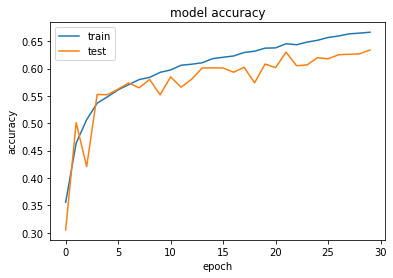

In [47]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


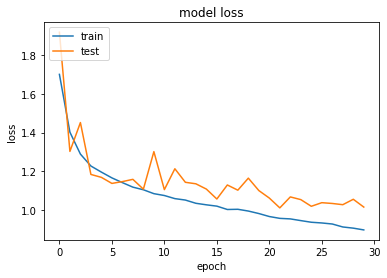

In [46]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

actual label is:happiness
predicted label is:happiness


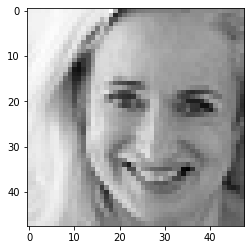

In [87]:
final_model = tf.keras.models.load_model(face_path)
from IPython.display import clear_output
import time
for k in range(10):
  print(f'actual label is:{label_to_text[y_test[k]]}')
  predicted_class = final_model.predict(tf.expand_dims(X_test[k],0)).argmax()
  print(f'predicted label is:{label_to_text[predicted_class]}')
  plt.imshow(x_test[k].reshape((48,48)),cmap = 'gray')
  plt.show()
  time.sleep(2)
  clear_output(wait= True)